In [43]:
import pandas as pd

In [44]:
#import dataset
df = pd.read_csv("/content/Information for Accommodation.csv")
df.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


In [45]:
#Check Null data
df.isnull().sum()

,0
Type,0
Name,0
Address,0
Rooms,0
Grade,293
District,0
AGA Division,19
PS/MC/UC,3
Logitiute,762
Latitude,760


In [46]:
#Remove all Grade NULL rows
df.dropna(subset=['Grade'], inplace=True)
print(f"Number of rows after removing null 'Grade' values: {df.shape[0]}")


Number of rows after removing null 'Grade' values: 1837


In [47]:
# check whether all three column null same time columns in the dataste
null_in_all_three = df[df['AGA Division'].isnull() & df['PS/MC/UC'].isnull() & df['Logitiute'].isnull()]
print(f"Number of rows where 'AGA Division', 'PS/MC/UC', and 'Logitiute' are all null: {len(null_in_all_three)}")
if not null_in_all_three.empty:
    print("Here are the first 5 such rows:")
    display(null_in_all_three.head())

Number of rows where 'AGA Division', 'PS/MC/UC', and 'Logitiute' are all null: 2
Here are the first 5 such rows:


,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
1038,Guest Houses,RAJ REST,"WORD NO. 7, PUTHUKUDIYIRUPPU, MULAITIVU",8,B,Mullaitivu,NaN,NaN,NaN,NaN
1065,Guest Houses,THANU REST,"UDAYA NAGAR WEST ,OFF KANDY ROAD,KILLINOCHCHI",6,B,Kilinochchi,NaN,NaN,NaN,NaN


In [48]:
#check wheteher any row Logitiute , Latitude are available but ['AGA Division'] or df['PS/MC/UC'] null
condition = (df['Logitiute'].notnull() & df['Latitude'].notnull()) & \
            (df['AGA Division'].isnull() | df['PS/MC/UC'].isnull())

filtered_rows = df[condition]

print(f"Number of rows where Logitiute and Latitude are available, but AGA Division or PS/MC/UC is null: {len(filtered_rows)}")
if not filtered_rows.empty:
    print("Here are the first 5 such rows:")
    display(filtered_rows.head())

Number of rows where Logitiute and Latitude are available, but AGA Division or PS/MC/UC is null: 7
Here are the first 5 such rows:


,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
131,Bangalows,KANO LANKA CENTRE,"MAHATENNA ESTATE, ELKADUWA, MATALE.",10,STANDARD,Matale,NaN,Ukuwela Divisional Secretariat,80.610315,7.409476
903,Guest Houses,REST HOUSE - WELLAWAYA,"ELLA ROAD,WALLAWAYA",5,B,Moneragala,NaN,Moneragala Divisional Secretariat,81.101003,6.732291
985,Guest Houses,HOTEL KINKINI,"306,BADULLA RD,BIBILE",15,A,Moneragala,NaN,Bibile Divisional Secretariat,81.223353,7.154410
1002,Guest Houses,HOTEL CANBO,"NO.98,MAHIYANGANA ROAD,BIBILE",9,A,Moneragala,NaN,Bibile Divisional Secretariat,81.222902,7.164342
1021,Guest Houses,OLD REST HOUSE,"OLD ELLA ROAD,WELLAWAYA",10,A,Moneragala,NaN,Wellawaya Divisional Secretariat,81.101002,6.732293


In [49]:
# Update 'AGA Division' for specified rows
df.loc[131, 'AGA Division'] = 'Mawathagama'
df.loc[903, 'AGA Division'] = 'Wellawaya'
df.loc[985, 'AGA Division'] = 'Bibile'
df.loc[1002, 'AGA Division'] = 'Bibile'
df.loc[1021, 'AGA Division'] = 'Wellawaya'

print("Updated 'AGA Division' for the specified rows.")
# Display the updated rows to confirm
print("Updated rows:")
display(df.loc[[131, 903, 985, 1002, 1021], ['Name', 'AGA Division', 'PS/MC/UC', 'Logitiute', 'Latitude']])

Updated 'AGA Division' for the specified rows.
Updated rows:


,Name,AGA Division,PS/MC/UC,Logitiute,Latitude
131,KANO LANKA CENTRE,Mawathagama,Ukuwela Divisional Secretariat,80.610315,7.409476
903,REST HOUSE - WELLAWAYA,Wellawaya,Moneragala Divisional Secretariat,81.101003,6.732291
985,HOTEL KINKINI,Bibile,Bibile Divisional Secretariat,81.223353,7.154410
1002,HOTEL CANBO,Bibile,Bibile Divisional Secretariat,81.222902,7.164342
1021,OLD REST HOUSE,Wellawaya,Wellawaya Divisional Secretariat,81.101002,6.732293


In [50]:
df.isnull().sum()

,0
Type,0
Name,0
Address,0
Rooms,0
Grade,0
District,0
AGA Division,13
PS/MC/UC,3
Logitiute,741
Latitude,740


In [51]:
# Check current null counts for 'AGA Division' and 'PS/MC/UC'
print("Null values before imputation:")
display(df[['AGA Division', 'PS/MC/UC']].isnull().sum())

# Fill null 'AGA Division' values with 'District' values
df['AGA Division'] = df['AGA Division'].fillna(df['District'])

# Fill null 'PS/MC/UC' values with 'District' values
df['PS/MC/UC'] = df['PS/MC/UC'].fillna(df['District'])

# Check null counts after imputation
print("\nNull values after imputation:")
display(df[['AGA Division', 'PS/MC/UC']].isnull().sum())

Null values before imputation:


,0
AGA Division,13
PS/MC/UC,3



Null values after imputation:


,0
AGA Division,0
PS/MC/UC,0


In [52]:
#Clean 'AGA Division' and 'PS/MC/UC' columns. Here are the first 5 rows of the modified columns
patterns_to_remove = ['Pradeshiya Sabha', 'Divisional Secretariat', 'Muncipal Council', 'Municipal Council', 'Urban Council']

for col in ['AGA Division', 'PS/MC/UC']:
    for pattern in patterns_to_remove:
        df[col] = df[col].astype(str).str.replace(pattern, '', regex=False)
    df[col] = df[col].astype(str).str.strip()


In [53]:
print("Unique values and their counts in the 'Grade' column:")
df['Grade'].value_counts()

Unique values and their counts in the 'Grade' column:


,count
Grade,
A,461
B,399
DELUXE,273
STANDARD,269
SUPERIOR,260
ONE,40
TWO,37
C,34
THREE,25


In [54]:
# Define the mapping for grades to A, B, or C
grade_remapping = {
    'DELUXE': 'A',
    'SUPERIOR': 'A',
    'FIVE': 'A',
    'FOUR': 'A',
    'STANDARD': 'B',
    'THREE': 'B',
    'TWO': 'B',
    'ONE': 'C'
}

# Apply the remapping to the 'Grade' column. Existing 'A', 'B', 'C' will remain unchanged.
df['Grade'] = df['Grade'].replace(grade_remapping)

print("Grade column after scaling to A, B, and C:")
print(df['Grade'].value_counts())

Grade column after scaling to A, B, and C:
Grade
A    1033
B     730
C      74
Name: count, dtype: int64


Generating box plot for 'Rooms' grouped by 'Grade' BEFORE outlier capping.


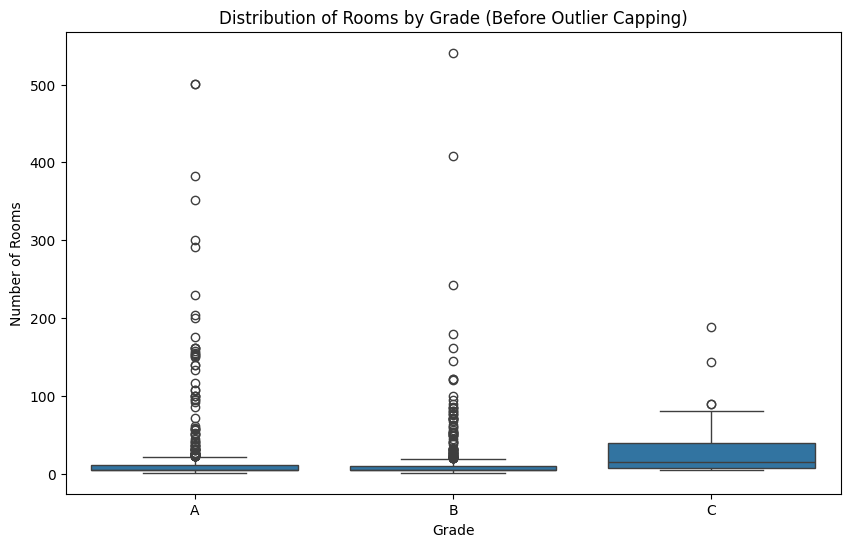

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



print("Generating box plot for 'Rooms' grouped by 'Grade' BEFORE outlier capping.")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Rooms', data=df)
plt.title('Distribution of Rooms by Grade (Before Outlier Capping)')
plt.xlabel('Grade')
plt.ylabel('Number of Rooms')
plt.show()



Outliers in 'Rooms' column capped by 'Grade'.
First 5 rows of 'Rooms' column after capping:
64    4.0
65    6.0
66    3.0
67    6.0
68    4.0
Name: Rooms, dtype: float64

Generating box plot for 'Rooms' grouped by 'Grade' after outlier capping.


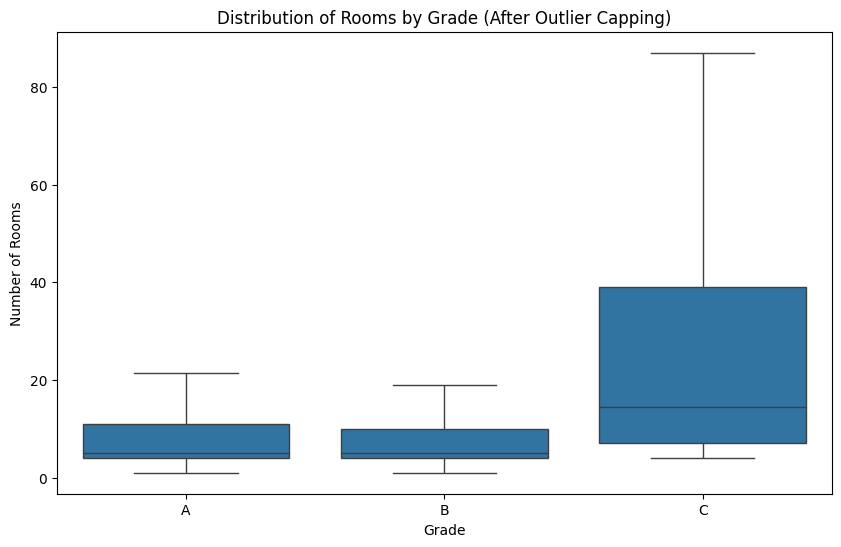

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply the function to cap outliers in 'Rooms' grouped by 'Grade'
df['Rooms'] = df.groupby('Grade')['Rooms'].transform(cap_outliers_iqr)

print("Outliers in 'Rooms' column capped by 'Grade'.")
print("First 5 rows of 'Rooms' column after capping:")
print(df['Rooms'].head())

# Create a box plot to visualize the distribution of 'Rooms' by 'Grade' after capping
print("\nGenerating box plot for 'Rooms' grouped by 'Grade' after outlier capping.")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Rooms', data=df)
plt.title('Distribution of Rooms by Grade (After Outlier Capping)')
plt.xlabel('Grade')
plt.ylabel('Number of Rooms')
plt.show()

In [57]:
print("Descriptive statistics for 'Rooms' grouped by 'Grade' AFTER capping outliers:")
df.groupby('Grade')['Rooms'].describe()

Descriptive statistics for 'Rooms' grouped by 'Grade' AFTER capping outliers:


,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
A,1033.0,8.012585,6.178219,1.0,4.0,5.0,11.0,21.5
B,730.0,7.516438,5.392712,1.0,4.0,5.0,10.0,19.0
C,74.0,25.351351,24.269284,4.0,7.0,14.5,39.0,87.0


In [58]:
# Export the DataFrame to a CSV file
df.to_csv('cleaned_accommodation_data.csv', index=False)
print("DataFrame exported successfully as 'cleaned_accommodation_data.csv'")

DataFrame exported successfully as 'cleaned_accommodation_data.csv'
